# Aviation Accident Prediction

### Summary:

- Data Sources:
    - Aviation Accidents: https://www.kaggle.com/khsamaha/aviation-accident-database-synopses?select=AviationData.csv
    
- Environment Setup & Data Load:    
- EDA:
- Preprocessing:

## Environment Setup:

#### Import packages

In [1]:
import pandas as pd
import numpy as np
import os

#### Get Current Working Directory

In [2]:
print(os.getcwd())

C:\Users\thoma\Desktop\Rutgers MBS\Learning_Directory\Aviation Accident Prediction Project


In [3]:
wd = os.getcwd()

## Load Data:

#### Aviation Data:

In [4]:
accident_df = pd.read_csv(os.path.join(wd,'AviationData.csv'))

In [5]:
accident_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,12/31/2019,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,12/31/2019,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,8/1/2020
2,20200102X54844,Accident,ANC20CA011,12/31/2019,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,2/1/2020
3,20191230X91852,Accident,CEN20CA048,12/30/2019,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,12/28/2019,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,3/1/2020


In [6]:
accident_by_code = accident_df.groupby(['Airport.Code'])['Event.Id'].nunique().to_frame().sort_values('Event.Id',ascending=False)

In [7]:
accident_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.of.Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [8]:
accident_df.shape

(84262, 31)

In [9]:
accident_df.isnull().sum()

Event.Id                      0
Investigation.Type            5
Accident.Number               0
Event.Date                    0
Location                     77
Country                     507
Latitude                  54099
Longitude                 54108
Airport.Code              36539
Airport.Name              33823
Injury.Severity               0
Aircraft.Damage            2709
Aircraft.Category         56754
Registration.Number        3850
Make                         70
Model                        99
Amateur.Built               609
Number.of.Engines          5034
Engine.Type                4256
FAR.Description           57056
Schedule                  72419
Purpose.of.Flight          4880
Air.Carrier               80093
Total.Fatal.Injuries      27203
Total.Serious.Injuries    29878
Total.Minor.Injuries      28670
Total.Uninjured           14589
Weather.Condition          3103
Broad.Phase.of.Flight      6608
Report.Status                 0
Publication.Date          14315
dtype: i

## EDA:

#### Aviation Accidents

In [10]:
accident_df.head(1)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,12/31/2019,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020


In [11]:
accident_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.of.Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [12]:
accident_df.isnull().sum()

Event.Id                      0
Investigation.Type            5
Accident.Number               0
Event.Date                    0
Location                     77
Country                     507
Latitude                  54099
Longitude                 54108
Airport.Code              36539
Airport.Name              33823
Injury.Severity               0
Aircraft.Damage            2709
Aircraft.Category         56754
Registration.Number        3850
Make                         70
Model                        99
Amateur.Built               609
Number.of.Engines          5034
Engine.Type                4256
FAR.Description           57056
Schedule                  72419
Purpose.of.Flight          4880
Air.Carrier               80093
Total.Fatal.Injuries      27203
Total.Serious.Injuries    29878
Total.Minor.Injuries      28670
Total.Uninjured           14589
Weather.Condition          3103
Broad.Phase.of.Flight      6608
Report.Status                 0
Publication.Date          14315
dtype: i

In [13]:
set(accident_df["Investigation.Type"])

{'Accident', 'Incident', nan}

In [14]:
accident_df.groupby(['Investigation.Type'])["Event.Id"].nunique().to_frame()

,Event.Id
Investigation.Type,
Accident,79757
Incident,3273


In [15]:
accident_df.groupby(['Investigation.Type', 'Aircraft.Damage'])["Event.Id"].nunique().to_frame()

Event.Id
Investigation.Type Aircraft.Damage          
Accident           Destroyed           17842
                   Minor                 726
                   Substantial         60458
Incident           Destroyed               9
                   Minor                1895
                   Substantial            35

In [16]:
accident_df.groupby(['Investigation.Type', 'Injury.Severity'])["Event.Id"].nunique().to_frame().head()

Event.Id
Investigation.Type Injury.Severity          
Accident           Fatal(1)             8280
                   Fatal(10)              43
                   Fatal(102)              2
                   Fatal(103)              1
                   Fatal(104)              2

In [17]:
accident_df.groupby(['Investigation.Type', 'Injury.Severity'])["Event.Id"].nunique().to_frame().tail()

Event.Id
Investigation.Type Injury.Severity          
Accident           Fatal(96)               1
                   Fatal(97)               2
                   Non-Fatal           62828
                   Unavailable           315
Incident           Incident             3273

In [18]:
accidents_only_df = accident_df[accident_df["Investigation.Type"]=='Accident']
accidents_only_df = accidents_only_df[accidents_only_df['Injury.Severity'] != 'Unavailable']
accidents_only_df['Severity'] = accidents_only_df['Injury.Severity'].apply(lambda x: 'Fatal' if x[0]=='F' else x)

In [19]:
set(accidents_only_df['Severity'])

{'Fatal', 'Non-Fatal'}

In [20]:
accidents_only_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,Severity
0,20200102X82407,Accident,WPR20CA055,12/31/2019,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020,Non-Fatal
1,20191231X83852,Accident,CEN20FA049,12/31/2019,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,8/1/2020,Fatal
2,20200102X54844,Accident,ANC20CA011,12/31/2019,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,2/1/2020,Non-Fatal
3,20191230X91852,Accident,CEN20CA048,12/30/2019,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019,Non-Fatal
5,20191228X23853,Accident,CEN20MA044,12/28/2019,"LAFAYETTE, LA",United States,30.176111,-92.007500,LFT,Lafayette Regional Apt,...,NaN,5.0,2.0,2.0,NaN,IMC,TAKEOFF,Preliminary,6/1/2020,Fatal


#### Conclusions from Aviation data exploration:

- should clean the nan from Investigation.Type
- all incidents involved no injuries
- Injury.Severity could be further cleaned for Fatal
- Event.Id can serve as primary key
- need to filter for 2018 only
- need to standardize some fields

## Preprocessing:

#### Aviation Accident Preprocessing Goals:
- events taking place in 2018
- events taking place in the United States
- standardize fields:
    - Make
    - Model
    - Injury.Severity
    - State/Location

In [21]:
def preprocess_accident_data(accident_df):
    """Preprocess raw accident data df."""
    # filter:
    # only accidents
    accident_df = accident_df[accident_df["Investigation.Type"]=='Accident']
    # clean severity
    accident_df['Severity'] = accident_df['Injury.Severity'].apply(lambda x: 'Fatal' if x[0]=='F' else x)
    
    # clean date field
    accident_df['Event.Date'] = pd.to_datetime(accident_df['Event.Date'])
    # standardize Make/Model fields
    accident_df['Make'] = accident_df['Make'].str.lower()
    accident_df['Model'] = accident_df['Model'].str.lower()
    
    # drop unnecessary features
    del accident_df['Injury.Severity']
    del accident_df['Location']
    del accident_df['Latitude']
    del accident_df['Longitude']
    del accident_df['Report.Status']
    del accident_df['Publication.Date']
    del accident_df['Schedule']
    del accident_df['Registration.Number']
    del accident_df['Accident.Number']
    del accident_df['Investigation.Type']
    del accident_df['Total.Fatal.Injuries']
    del accident_df['Total.Serious.Injuries']
    del accident_df['Total.Minor.Injuries']
    del accident_df['Total.Uninjured']
    
    accident_df = accident_df[accident_df['Severity'].isin(['Fatal','Non-Fatal'])]
    
    return accident_df

In [22]:
clean_accidents = preprocess_accident_data(accident_df)

c:\users\thoma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\thoma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\thoma\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [23]:
#clean_accidents = clean_accidents[clean_accidents['Severity'].isin(['Fatal','Non-Fatal'])]

In [24]:
clean_accidents.head()

,Event.Id,Event.Date,Country,Airport.Code,Airport.Name,Aircraft.Damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.Flight,Air.Carrier,Weather.Condition,Broad.Phase.of.Flight,Severity
0,20200102X82407,2019-12-31,United States,LLR,Little River,Substantial,Airplane,cessna,175,No,1.0,Reciprocating,Part 91: General Aviation,Personal,NaN,VMC,TAKEOFF,Non-Fatal
1,20191231X83852,2019-12-31,United States,OJC,Johnson County Executive,Destroyed,Airplane,mooney,m20s,No,1.0,Reciprocating,Part 91: General Aviation,Personal,NaN,VMC,TAKEOFF,Fatal
2,20200102X54844,2019-12-31,United States,NaN,NaN,Substantial,Airplane,cessna,170,No,1.0,NaN,Part 91: General Aviation,Personal,NaN,NaN,NaN,Non-Fatal
3,20191230X91852,2019-12-30,United States,NaN,NaN,Substantial,Airplane,vans,rv 10,Yes,NaN,NaN,Part 91: General Aviation,Personal,NaN,NaN,NaN,Non-Fatal
5,20191228X23853,2019-12-28,United States,LFT,Lafayette Regional Apt,Destroyed,Airplane,piper,pa 31t,No,2.0,Turbo Prop,Part 91: General Aviation,Executive/Corporate,NaN,IMC,TAKEOFF,Fatal


In [25]:
clean_accidents.columns

Index(['Event.Id', 'Event.Date', 'Country', 'Airport.Code', 'Airport.Name',
       'Aircraft.Damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.Flight', 'Air.Carrier', 'Weather.Condition',
       'Broad.Phase.of.Flight', 'Severity'],
      dtype='object')

In [26]:
clean_accidents.shape

(80493, 18)

In [27]:
clean_accidents.isnull().sum()

Event.Id                     0
Event.Date                   0
Country                    461
Airport.Code             34763
Airport.Name             32107
Aircraft.Damage           1190
Aircraft.Category        54516
Make                        36
Model                       59
Amateur.Built              321
Number.of.Engines         3971
Engine.Type               3186
FAR.Description          54667
Purpose.of.Flight         3259
Air.Carrier              77390
Weather.Condition         1953
Broad.Phase.of.Flight     5566
Severity                     0
dtype: int64

In [28]:
clean_accidents.groupby(['Weather.Condition'])['Event.Id'].nunique().to_frame()

,Event.Id
Weather.Condition,
IMC,5566
UNK,888
VMC,71068


In [29]:
clean_accidents.groupby(['Severity'])['Event.Id'].nunique().to_frame()

,Event.Id
Severity,
Fatal,16614
Non-Fatal,62828


In [30]:
set(clean_accidents['Severity'])

{'Fatal', 'Non-Fatal'}

#### Prepare dataset for scikit learn:

In [31]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [32]:
# tbh i did not use this , it didnt seem to work 100%, i was getting errors about converting floats to ints.  instead used preprocessing built into sklearn

def encode_target(df, target_column):
    """Add column to df with integers for the target."""
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [33]:
# categorical_features = cat_feet 
paws = ['Event.Date',
'Country',
'Airport.Code',
'Airport.Name',
'Aircraft.Damage',
'Aircraft.Category',
'Make',
'Model',
'Amateur.Built',
'Engine.Type',
'FAR.Description',
'Purpose.of.Flight',
'Air.Carrier',
'Weather.Condition',
'Broad.Phase.of.Flight']

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [35]:
COLOR = 'white'
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [36]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = ''
        else:
            title = ''

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [37]:
classes = ['Fatal', 'Non-Fatal']

{'Non-Fatal', 'Fatal'}
classifier: Decision Tree
test size: 0.1
Mean p & r 0.63 0.31
Normalized confusion matrix


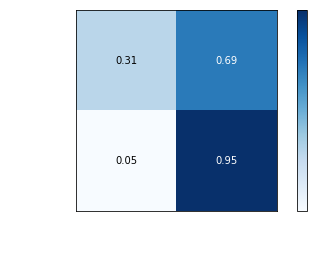

classifier: Decision Tree
[0.63] 
 [0.31]
test size: 0.2
Mean p & r 0.625 0.31
Normalized confusion matrix


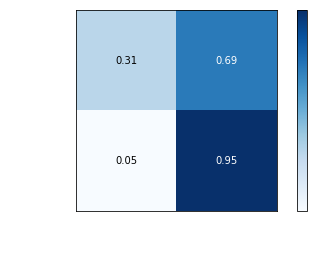

classifier: Decision Tree
[0.63, 0.62] 
 [0.31, 0.31]
test size: 0.3
Mean p & r 0.6333 0.31
Normalized confusion matrix


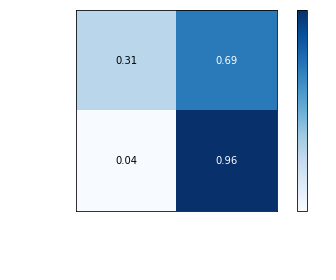

classifier: Decision Tree
[0.63, 0.62, 0.65] 
 [0.31, 0.31, 0.31]
test size: 0.4
Mean p & r 0.6325 0.305
Normalized confusion matrix


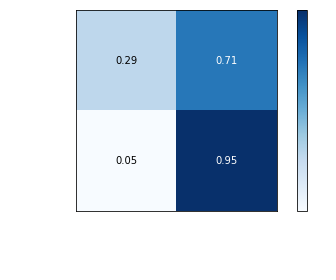

classifier: Decision Tree
[0.63, 0.62, 0.65, 0.63] 
 [0.31, 0.31, 0.31, 0.29]
test size: 0.5
Mean p & r 0.632 0.304
Normalized confusion matrix


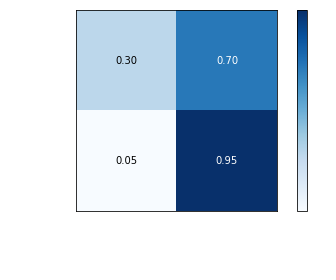

classifier: Decision Tree
[0.63, 0.62, 0.65, 0.63, 0.63] 
 [0.31, 0.31, 0.31, 0.29, 0.3]
test size: 0.6
Mean p & r 0.6317 0.3033
Normalized confusion matrix


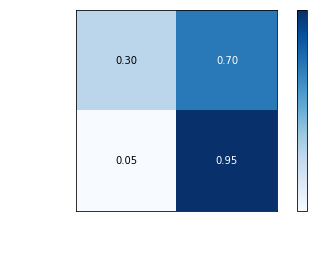

classifier: Decision Tree
[0.63, 0.62, 0.65, 0.63, 0.63, 0.63] 
 [0.31, 0.31, 0.31, 0.29, 0.3, 0.3]
test size: 0.7
Mean p & r 0.6329 0.2957
Normalized confusion matrix


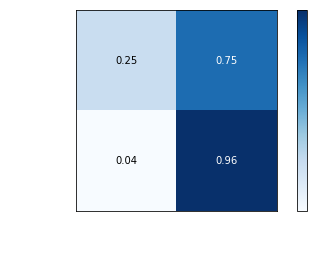

classifier: Decision Tree
[0.63, 0.62, 0.65, 0.63, 0.63, 0.63, 0.64] 
 [0.31, 0.31, 0.31, 0.29, 0.3, 0.3, 0.25]
test size: 0.8
Mean p & r 0.635 0.29
Normalized confusion matrix


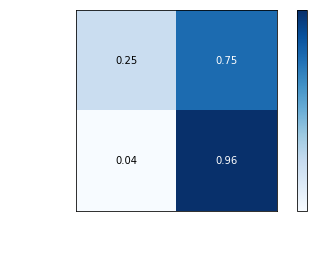

classifier: Decision Tree
[0.63, 0.62, 0.65, 0.63, 0.63, 0.63, 0.64, 0.65] 
 [0.31, 0.31, 0.31, 0.29, 0.3, 0.3, 0.25, 0.25]
test size: 0.9
Mean p & r 0.6333 0.2911
Normalized confusion matrix


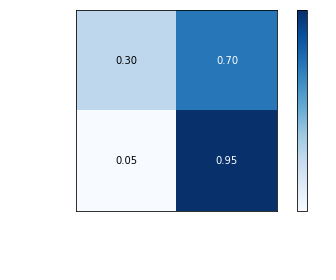

classifier: Decision Tree
[0.63, 0.62, 0.65, 0.63, 0.63, 0.63, 0.64, 0.65, 0.62] 
 [0.31, 0.31, 0.31, 0.29, 0.3, 0.3, 0.25, 0.25, 0.3]


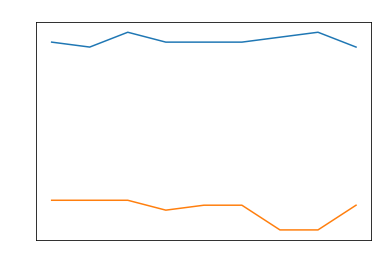

classifier: AdaBoost
test size: 0.1
Mean p & r 0.62 0.27
Normalized confusion matrix


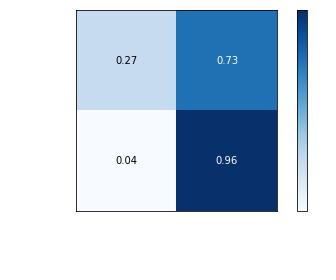

classifier: AdaBoost
[0.62] 
 [0.27]
test size: 0.2
Mean p & r 0.615 0.275
Normalized confusion matrix


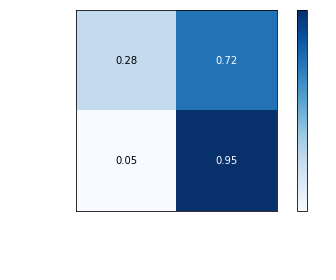

classifier: AdaBoost
[0.62, 0.61] 
 [0.27, 0.28]
test size: 0.3
Mean p & r 0.6267 0.2767
Normalized confusion matrix


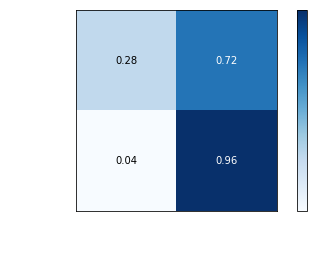

classifier: AdaBoost
[0.62, 0.61, 0.65] 
 [0.27, 0.28, 0.28]
test size: 0.4
Mean p & r 0.6275 0.2775
Normalized confusion matrix


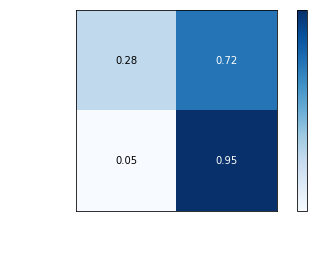

classifier: AdaBoost
[0.62, 0.61, 0.65, 0.63] 
 [0.27, 0.28, 0.28, 0.28]
test size: 0.5
Mean p & r 0.63 0.278
Normalized confusion matrix


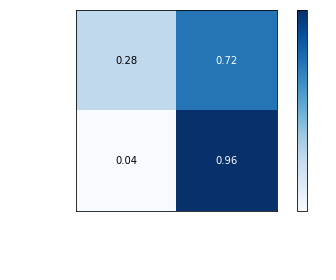

classifier: AdaBoost
[0.62, 0.61, 0.65, 0.63, 0.64] 
 [0.27, 0.28, 0.28, 0.28, 0.28]
test size: 0.6
Mean p & r 0.6317 0.2783
Normalized confusion matrix


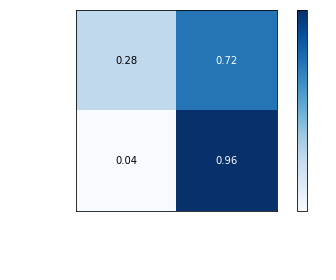

classifier: AdaBoost
[0.62, 0.61, 0.65, 0.63, 0.64, 0.64] 
 [0.27, 0.28, 0.28, 0.28, 0.28, 0.28]
test size: 0.7
Mean p & r 0.6314 0.28
Normalized confusion matrix


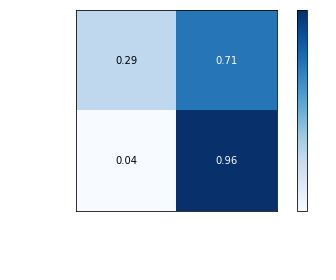

classifier: AdaBoost
[0.62, 0.61, 0.65, 0.63, 0.64, 0.64, 0.63] 
 [0.27, 0.28, 0.28, 0.28, 0.28, 0.28, 0.29]
test size: 0.8
Mean p & r 0.6312 0.2812
Normalized confusion matrix


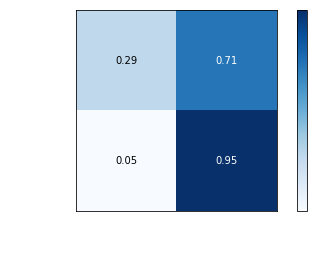

classifier: AdaBoost
[0.62, 0.61, 0.65, 0.63, 0.64, 0.64, 0.63, 0.63] 
 [0.27, 0.28, 0.28, 0.28, 0.28, 0.28, 0.29, 0.29]
test size: 0.9
Mean p & r 0.6289 0.2833
Normalized confusion matrix


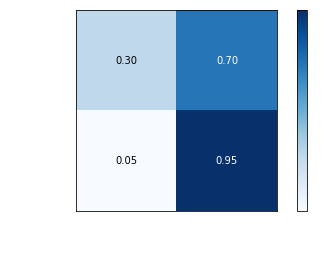

classifier: AdaBoost
[0.62, 0.61, 0.65, 0.63, 0.64, 0.64, 0.63, 0.63, 0.61] 
 [0.27, 0.28, 0.28, 0.28, 0.28, 0.28, 0.29, 0.29, 0.3]


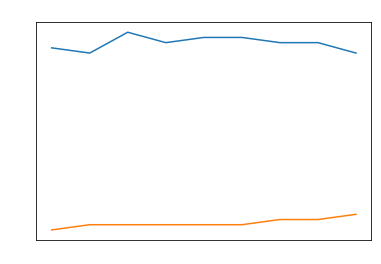

classifier: gradaboost
test size: 0.1
Mean p & r 0.62 0.28
Normalized confusion matrix


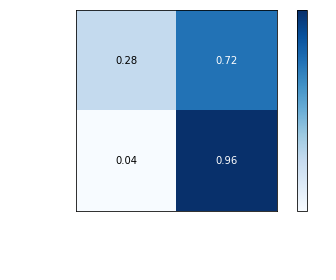

classifier: gradaboost
[0.62] 
 [0.28]
test size: 0.2
Mean p & r 0.62 0.29
Normalized confusion matrix


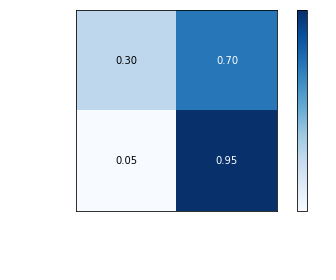

classifier: gradaboost
[0.62, 0.62] 
 [0.28, 0.3]
test size: 0.3
Mean p & r 0.6267 0.2933
Normalized confusion matrix


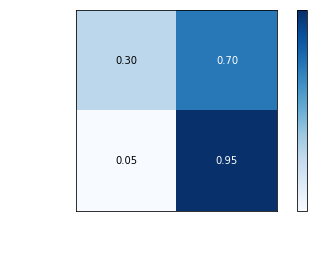

classifier: gradaboost
[0.62, 0.62, 0.64] 
 [0.28, 0.3, 0.3]
test size: 0.4
Mean p & r 0.63 0.295
Normalized confusion matrix


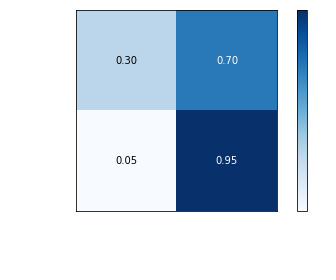

classifier: gradaboost
[0.62, 0.62, 0.64, 0.64] 
 [0.28, 0.3, 0.3, 0.3]
test size: 0.5
Mean p & r 0.63 0.296
Normalized confusion matrix


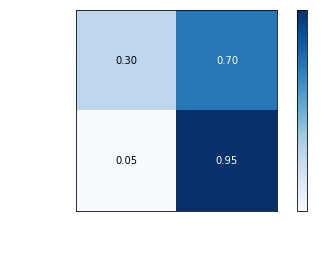

classifier: gradaboost
[0.62, 0.62, 0.64, 0.64, 0.63] 
 [0.28, 0.3, 0.3, 0.3, 0.3]
test size: 0.6
Mean p & r 0.63 0.295
Normalized confusion matrix


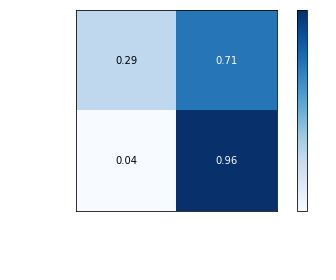

classifier: gradaboost
[0.62, 0.62, 0.64, 0.64, 0.63, 0.63] 
 [0.28, 0.3, 0.3, 0.3, 0.3, 0.29]
test size: 0.7
Mean p & r 0.6314 0.2957
Normalized confusion matrix


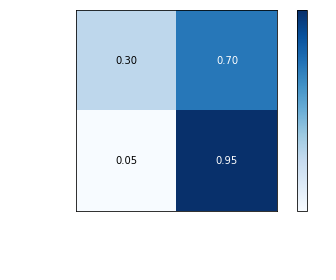

classifier: gradaboost
[0.62, 0.62, 0.64, 0.64, 0.63, 0.63, 0.64] 
 [0.28, 0.3, 0.3, 0.3, 0.3, 0.29, 0.3]
test size: 0.8
Mean p & r 0.6312 0.295
Normalized confusion matrix


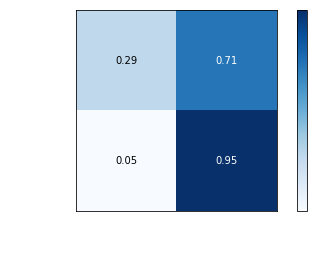

classifier: gradaboost
[0.62, 0.62, 0.64, 0.64, 0.63, 0.63, 0.64, 0.63] 
 [0.28, 0.3, 0.3, 0.3, 0.3, 0.29, 0.3, 0.29]
test size: 0.9
Mean p & r 0.6311 0.2956
Normalized confusion matrix


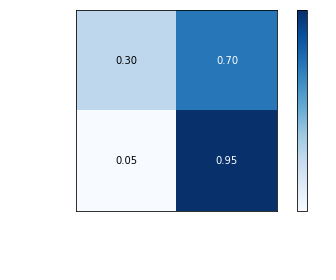

classifier: gradaboost
[0.62, 0.62, 0.64, 0.64, 0.63, 0.63, 0.64, 0.63, 0.63] 
 [0.28, 0.3, 0.3, 0.3, 0.3, 0.29, 0.3, 0.29, 0.3]


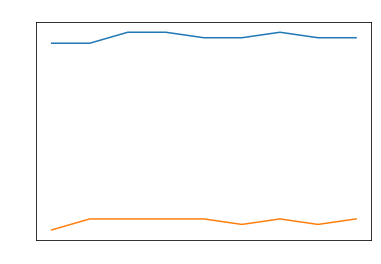

In [38]:
# this is the cell where it all happens

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



features = ['Weather.Condition','Make','Model']
X = clean_accidents[paws + ['Number.of.Engines']]
y = clean_accidents['Severity']

print(set(y))

# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
names = ["Decision Tree", "AdaBoost", "gradaboost"]
# "nearest neighbors",
classifiers = [
    
    # stripped out most classifiers as they either - threw erros with our data types, or took too long run such that i couldnt reasonably test them
    #KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    
    DecisionTreeClassifier(max_depth=5),
    
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    #MLPClassifier(alpha=1, max_iter=5)]
    
    AdaBoostClassifier(),
    GradientBoostingClassifier()]

    #BaggingClassifier()]
    #GaussianNB()]
    #QuadraticDiscriminantAnalysis()]

# here we set up transformation and normalization of data
# source: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
numeric_features = ['Number.of.Engines']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[ ('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
tsizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# loop through classifiers, for each classifier test performance when using various sample sizes.  chart precision vs recall for each classifier
for classifier in classifiers:
    print(f'classifier: {names[classifiers.index(classifier)]}')
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
    tsize_precision = []
    tsize_recall = []
    for tsize in tsizes:
        print(f'test size: {tsize}')
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize)

        clf.fit(X_train, y_train)

        tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test), labels=['Non-Fatal', 'Fatal']).ravel()
        precision = (tp)/(tp+fp)
        recall = (tp)/(fn+tp)
        tsize_precision.append(round(precision,2))
        tsize_recall.append(round(recall,2))
        print('Mean p & r',round(sum(tsize_precision)/len(tsize_precision),4),round(sum(tsize_recall)/len(tsize_recall),4))
        labels=['Non-Fatal', 'Fatal']
        classes = labels
        plot_confusion_matrix(y_test, clf.predict(X_test), classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)
        plt.show()
        print(f'classifier: {names[classifiers.index(classifier)]}')
        print(tsize_precision, '\n',tsize_recall)

        
    
    plt.plot(tsizes, tsize_precision)
    plt.plot(tsizes, tsize_recall)
    plt.title('Precision & Recall by Training Set Size',color='white')
    plt.ylim=([0,100])
    plt.show()
    
    
#plt.title('Precision & Recall by Training Set Size',color='white')
#plt.ylim=(0,100)
#plt.show()
    


In [39]:
decsion_tree_df = pd.DataFrame({'Test Size':[0.2,0.4,0.6,0.8],
                         'Precision':[0.63,0.62,0.63,0.62],
                         'Recall':[0.29,0.29,0.29,0.29]
                        })

In [40]:
decsion_tree_df

,Test Size,Precision,Recall
0,0.2,0.63,0.29
1,0.4,0.62,0.29
2,0.6,0.63,0.29
3,0.8,0.62,0.29


In [41]:
Ada_boost_df = pd.DataFrame({'Test Size':[0.2,0.4,0.6,0.8],
                         'Precision':[0.62,0.64,0.63,0.63],
                         'Recall':[0.28,0.29,0.28,0.28]
                        })

In [42]:
Ada_boost_df

,Test Size,Precision,Recall
0,0.2,0.62,0.28
1,0.4,0.64,0.29
2,0.6,0.63,0.28
3,0.8,0.63,0.28


In [43]:
grada_boost_df  = pd.DataFrame({'Test Size':[0.2,0.4,0.6,0.8],
                         'Precision':[0.64,0.64,0.65,0.64],
                         'Recall':[0.3,0.3,0.28,0.29]
                        })

In [44]:
grada_boost_df

,Test Size,Precision,Recall
0,0.2,0.64,0.30
1,0.4,0.64,0.30
2,0.6,0.65,0.28
3,0.8,0.64,0.29
